In [80]:
import numpy as np
import pandas as pd

import math

import fc_methods as fc
import scipy.stats

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from quicktools import visualize

import glob

In [18]:
# Load the data
trackdat = pd.read_csv(r"C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\myconnectome\behavior\trackingdata.csv", sep='\t')

In [19]:
trackdat.shape

(103, 124)

In [20]:
trackdat = trackdat.replace('.', np.nan)

In [5]:
# drop too NA-ish cols
drop_thresh = math.ceil(len(rna_reg) * .9)      # select threshold for cols drop (# non-NA values)
drop_thresh

93

In [22]:
trackdat.dropna(thresh = drop_thresh, axis = 1, inplace=True)
trackdat.shape

(103, 28)

In [23]:
# Save indexes
sub_index = trackdat.iloc[:,0]

In [24]:
# Drop date and sub_index and day_of_week columns
trackdat = trackdat.drop([trackdat.columns[0],trackdat.columns[1],trackdat.columns[5]], axis=1)

In [25]:
# Convert strings to floats
trackdat = trackdat.applymap(lambda x: float(x))

In [26]:
# Fill NAs with means

trackdat = trackdat.fillna(rna_reg.mean())

In [2]:
def calc_conn(data, func, bins=10):
    
    n_vars = data.shape[1]
    
    conn = np.zeros((n_vars, n_vars))
    conn_p = np.zeros((n_vars, n_vars))
    
    if str(func)[10:14] == 'pear':
        print('Pearson')
        for i in range(n_vars):
            for j in range(n_vars):
                    (conn[i, j], 
                     conn_p[i, j]) = func(data.iloc[:,i], data.iloc[:,j])

    elif str(func)[10:14] == 'calc':
        print('MI')
        for i in range(n_vars):
            for j in range(i+1, n_vars):
                conn[i, j] = func(data.iloc[:,i], data.iloc[:,j], bins)
                conn[j, i] = conn[i, j]
                
    return conn

In [28]:
mi = calc_conn(trackdat, fc.calc_MI, bins=int(np.sqrt(trackdat.shape[0])))

MI


In [29]:
pearson = calc_conn(trackdat, scipy.stats.pearsonr)

Pearson


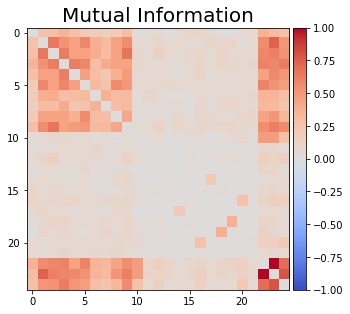

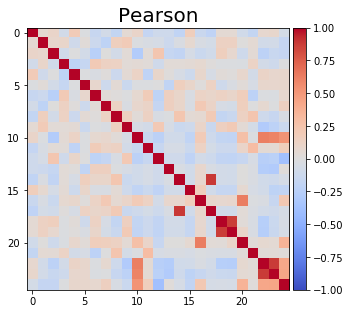

(None, None)

In [17]:
visualize(mi, 'Mutual Information'), visualize(pearson, 'Pearson')

## MEG data

In [20]:
# Load the data
meg = pd.read_csv(r"C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\MEG\100307.csv")

In [21]:
meg.shape

(5090, 246)

In [22]:
meg.head()

,['A22','A104','A241','A138','A214','A71','A26','A93','A39','A125',...,'A106','A187','A48','A221','A196','A133','A158','A44','A134','A216']
0,-4.1145,-6.1643,3.8079,6.8692,-18.3751,11.0709,1.2080,5.9853,11.2406,-6.6864,...,16.3833,-9.9155,19.3733,1.2164,-2.7109,-20.6016,-28.2537,-14.1048,22.0645,-19.7628
1,-19.4757,0.1270,2.6783,8.5799,5.6231,19.0076,-17.1698,27.6823,20.9592,-13.5601,...,-6.4758,-0.6936,-4.0082,38.1771,0.4616,-21.7808,-10.4020,-9.1974,14.9483,-16.1127
2,-17.3436,-1.1525,16.3749,6.6844,26.7096,10.3680,-7.0369,20.8506,-8.9868,-5.4357,...,2.7780,-5.7442,-11.8229,36.3841,8.9739,-23.3352,-0.6122,-11.4067,-2.0597,33.7219
3,-17.9554,1.8806,-10.3567,-0.5019,19.2674,9.4805,-9.9102,20.5705,30.0910,-2.5122,...,5.1795,-19.1259,-7.6769,6.3820,17.2063,3.3194,-6.2129,1.2385,18.5846,36.1654
4,-12.1743,-20.7685,2.3892,-27.1260,14.5734,-15.9105,-22.0035,16.6735,28.8184,-16.9476,...,-57.6891,-38.8448,-50.3868,0.7454,27.2522,-17.2140,-2.9338,-21.3632,7.1465,16.9352


In [23]:
mi_meg = calc_conn(meg, fc.calc_MI, bins=10)

MI


In [24]:
pearson_meg = calc_conn(meg, scipy.stats.pearsonr)

Pearson


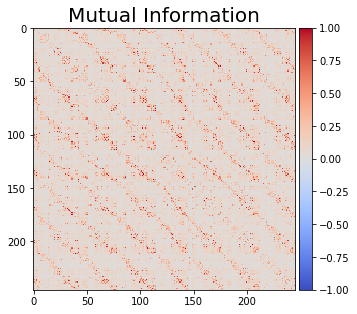

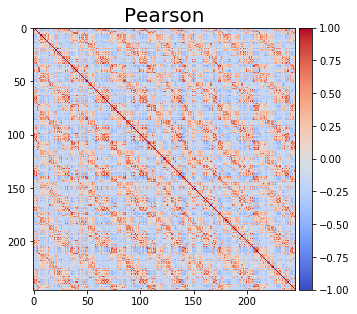

(None, None)

In [25]:
visualize(mi_meg, 'Mutual Information'), visualize(pearson_meg, 'Pearson')

## fMRI data

In [32]:
# Load the data
fmri_motor_101309 = pd.read_csv(r"C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\fMRI\HCP_parcellated_smoothing5_100subjects_Glasser_MOTOR\101309.csv", header=None)

In [34]:
fmri_motor_101309.shape

(558, 180)

In [38]:
mi_fmri_m_101309 = calc_conn(fmri_motor_101309, fc.calc_MI, \
                             bins=int(np.sqrt(fmri_motor_101309.shape[0])))

MI


In [39]:
pearson_fmri_m_101309 = calc_conn(fmri_motor_101309, scipy.stats.pearsonr)

Pearson


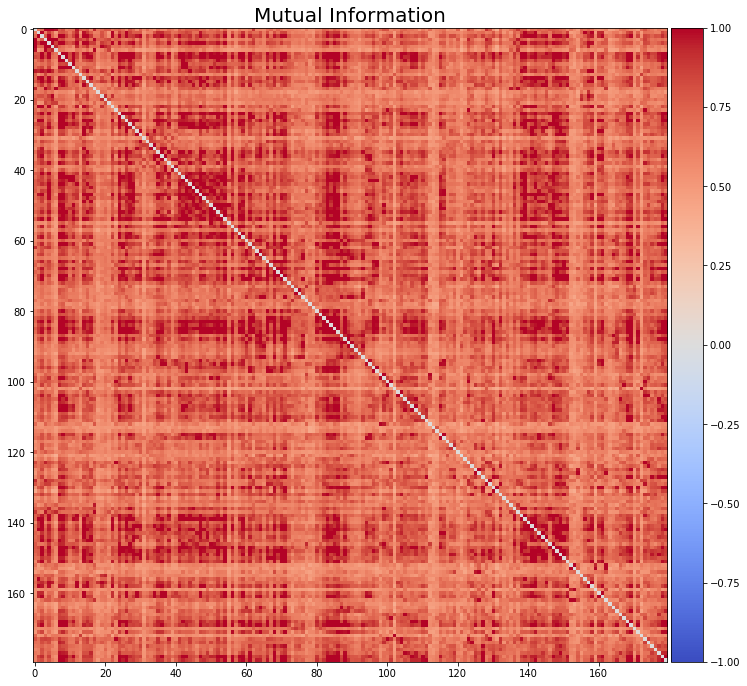

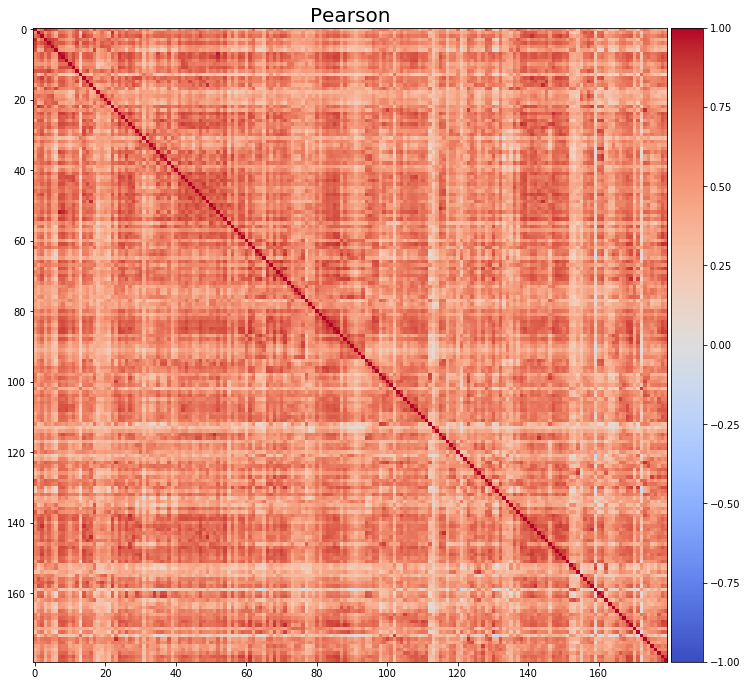

(None, None)

In [42]:
visualize(mi_fmri_m_101309, 'Mutual Information', figsize=(12,12)), \
visualize(pearson_fmri_m_101309, 'Pearson', figsize=(12,12))

In [19]:
def load_compute_visualize(filename):
    # Load the data
    data = pd.read_csv(filename, header=None)
    # Calc MI
    data_mi = calc_conn(data, fc.calc_MI, \
                             bins=int(np.sqrt(data.shape[0])))
    # Calc Pearson
    data_pearson = calc_conn(data, scipy.stats.pearsonr)
    
    # Slice obs name
    name = filename[-10:-4]
    
    # Visualize
    visualize(data_mi, 'Mutual Information {}'.format(name), figsize=(12,12)), \
    visualize(data_pearson, 'Pearson {}'.format(name), figsize=(12,12))

MI
Pearson


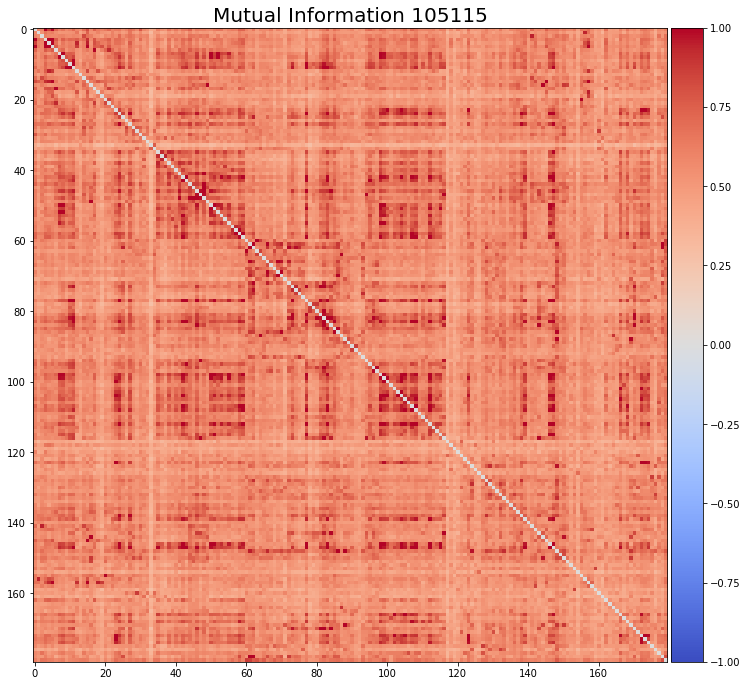

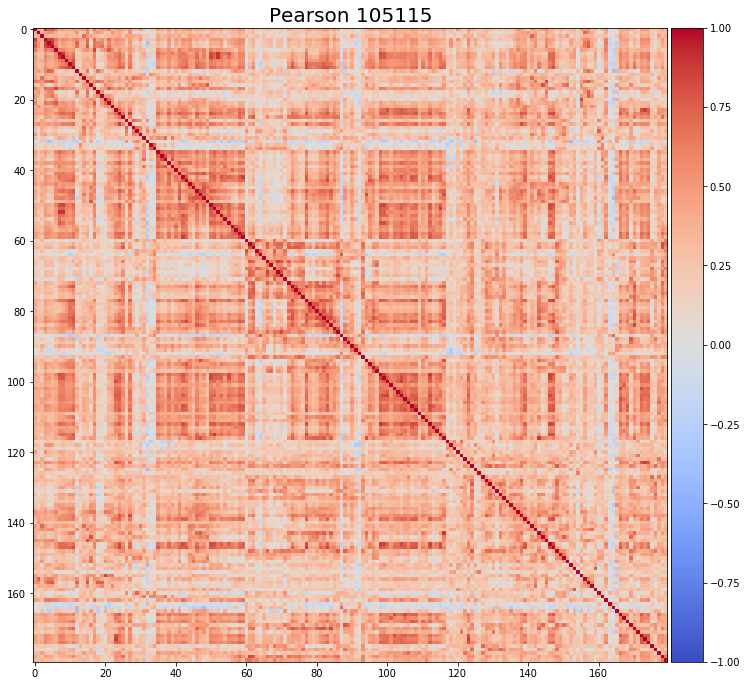

In [20]:
load_compute_visualize(r"C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\fMRI\HCP_parcellated_smoothing5_100subjects_Glasser_MOTOR\105115.csv")

MI
Pearson


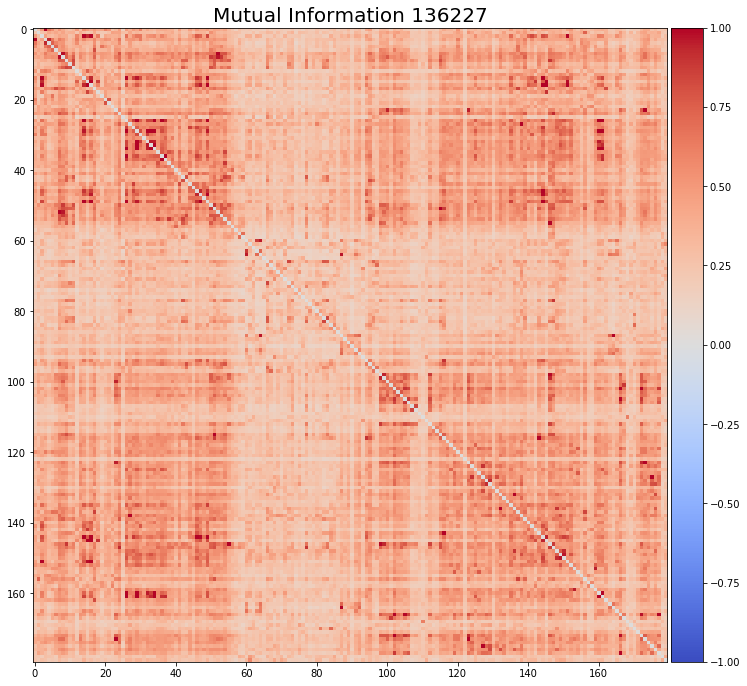

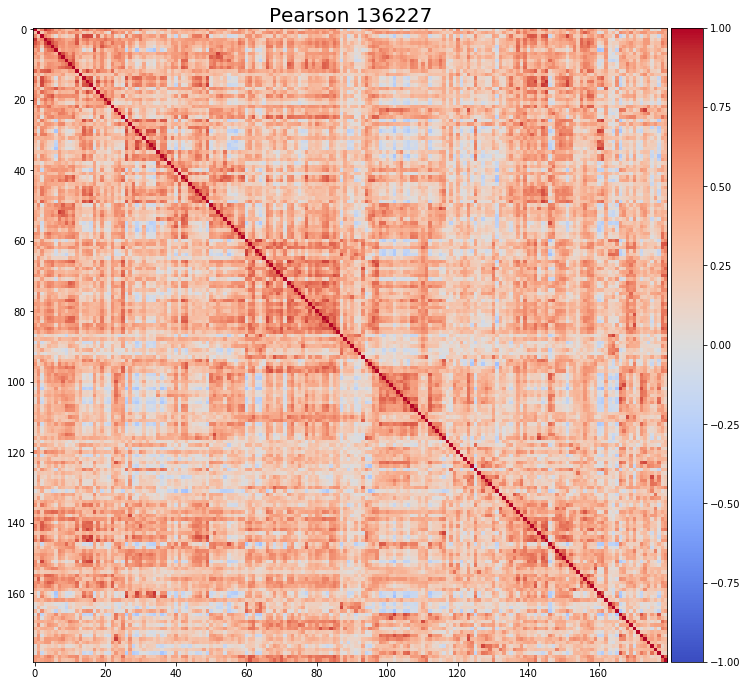

In [22]:
load_compute_visualize(r"C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\fMRI\HCP_parcellated_smoothing5_100subjects_Glasser_MOTOR\136227.csv")

MI
Pearson


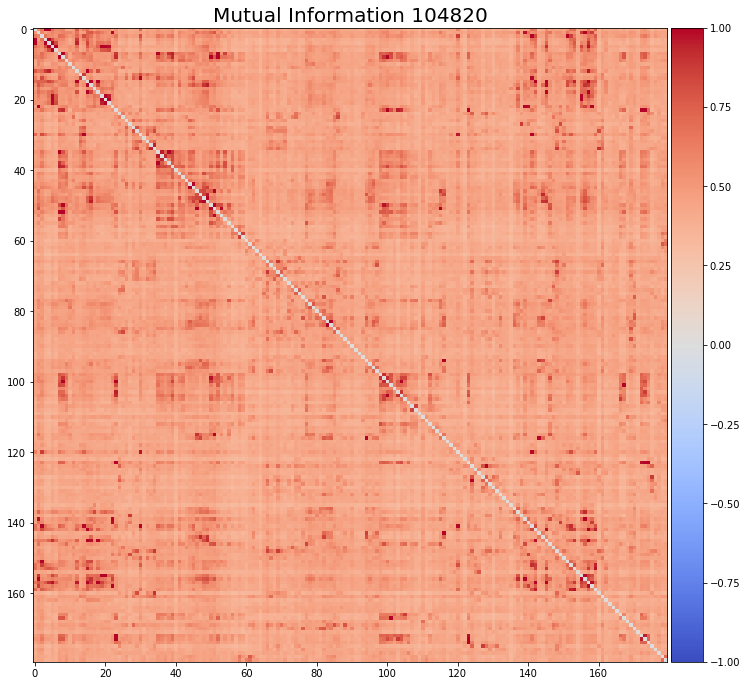

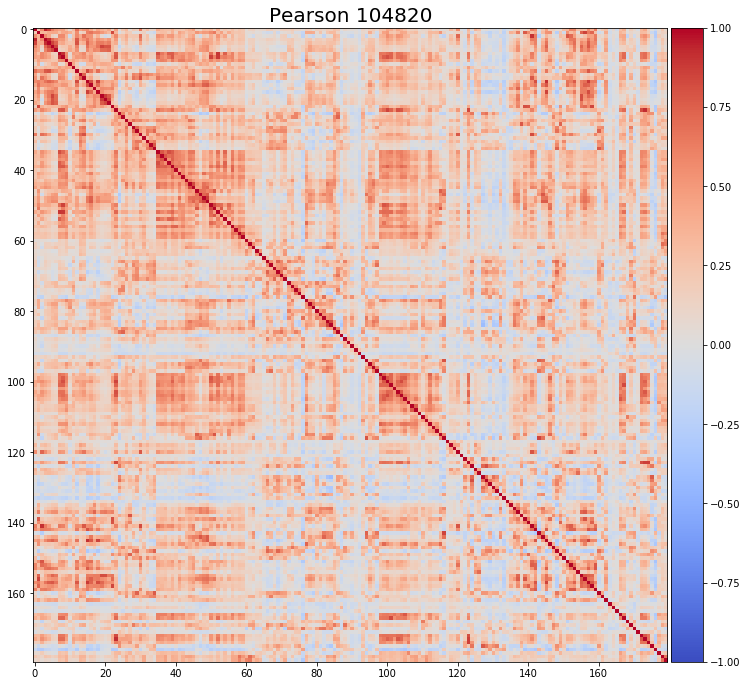

In [23]:
load_compute_visualize(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\fMRI\HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day2\104820.csv')

MI
Pearson


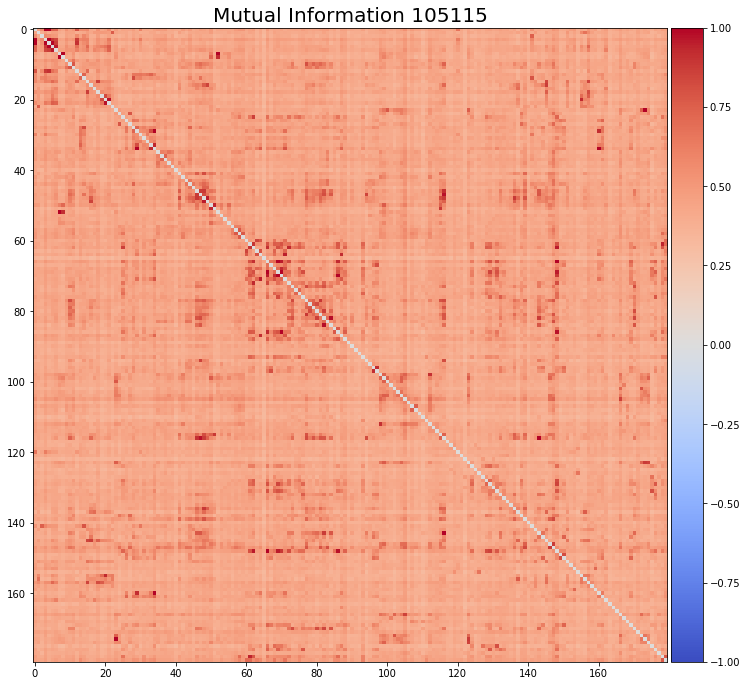

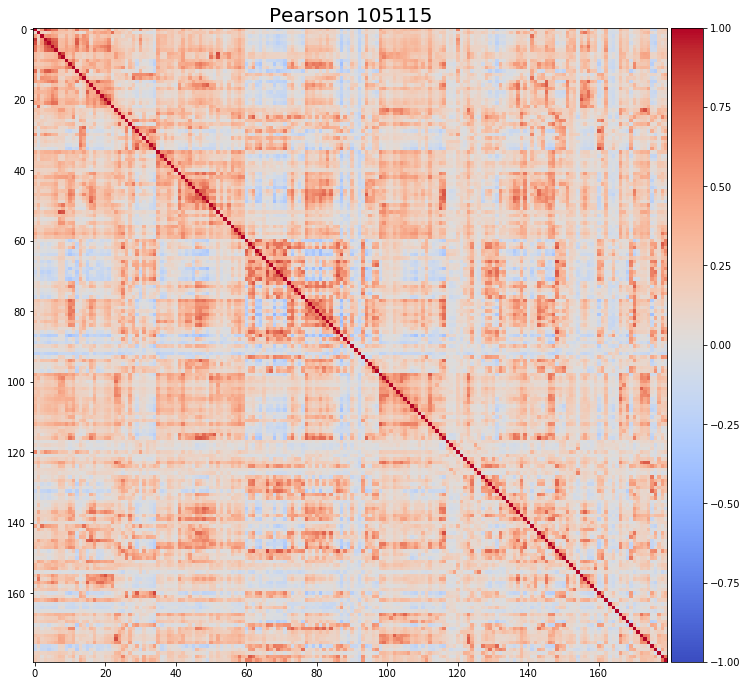

In [24]:
load_compute_visualize(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\fMRI\HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day2\105115.csv')

## Weather and Google Trends data

In [69]:
def load_compute_visualize_2(filename, figsize=(12,12), header='infer', index_col=None,\
                             sep=',', dropna=False, bins=''):
    # Load the data
    data = pd.read_csv(filename, header=header, index_col=index_col, sep=sep)
    
    # Drop NA
    if dropna == 1:
        data = data.dropna(axis=0)
        
    # Define bins
    if bins == '':
        bins = bins=int(np.sqrt(data.shape[0]))
    
    # Compute MI
    data_mi = calc_conn(data, fc.calc_MI, \
                             bins=bins)
    # Compute Pearson
    data_pearson = calc_conn(data, scipy.stats.pearsonr)
    
    # Slice name
    name = filename[-10:-4]
    
    # Visualize
    visualize(data_mi, 'Mutual Information {}'.format(name), figsize=figsize), \
    visualize(data_pearson, 'Pearson {}'.format(name), figsize=figsize)

MI
Pearson


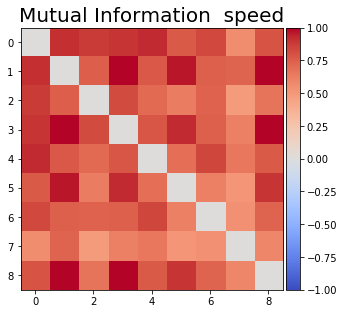

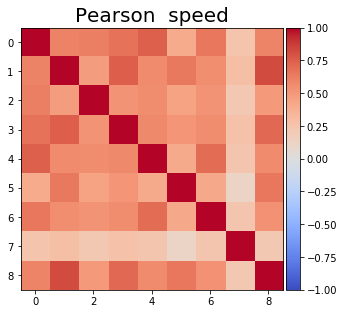

In [70]:
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\weather\data_by_variable\Sheet 1-Average wind speed.csv',\
                         sep=';', index_col=0, figsize=(5,5))

MI
Pearson


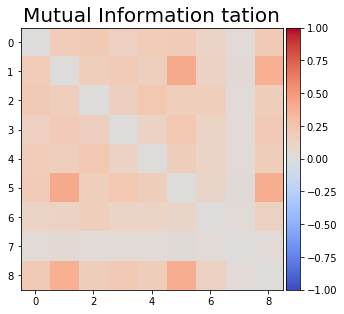

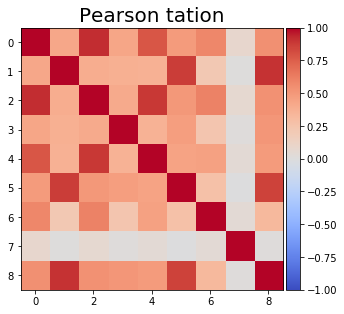

In [75]:
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\weather\data_by_variable\Sheet 3-Precipitation.csv',\
                         sep=';', dropna=True, index_col=0, figsize=(5,5))

MI
Pearson


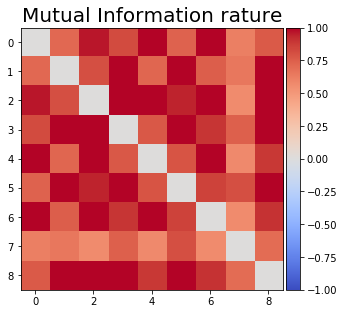

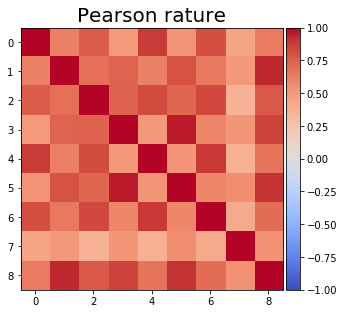

In [76]:
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\weather\data_by_variable\Sheet 4-Maximum temperature.csv',\
                         sep=';', dropna=True, index_col=0, figsize=(5,5))

MI
Pearson


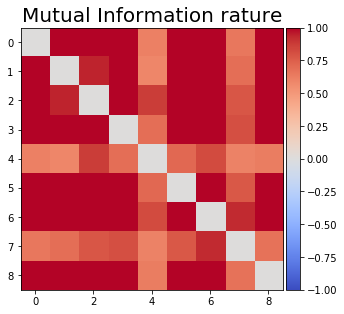

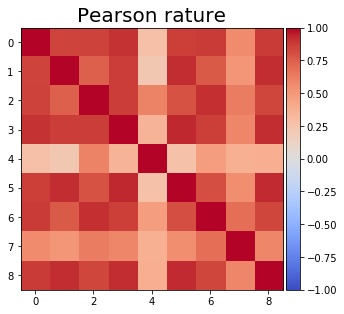

In [77]:
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\weather\data_by_variable\Sheet 5-Minimum temperature.csv',\
                         sep=';', dropna=True, index_col=0, figsize=(5,5))

MI
Pearson


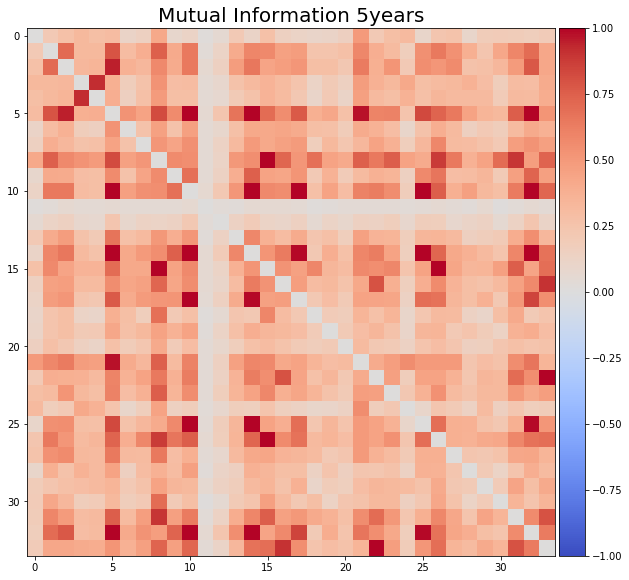

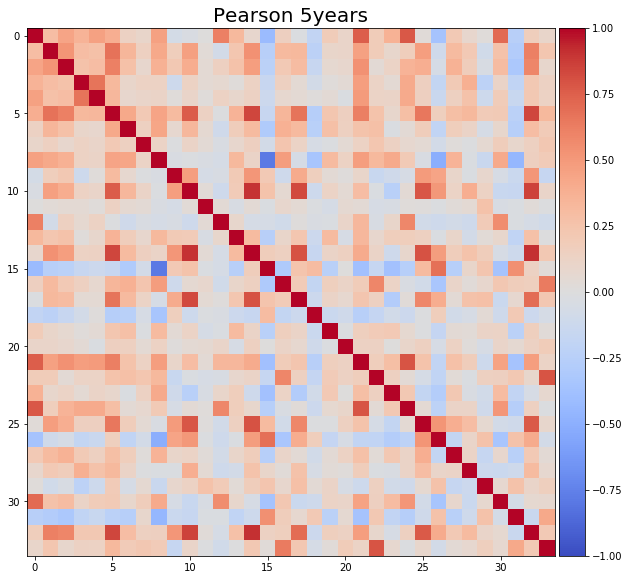

In [79]:
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\google_trends\googletrends_allphrases_5years.csv',\
                         sep=';', dropna=True, index_col=0, figsize=(10,10))

## Stock data

In [86]:
stock = pd.read_csv(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\stock_exchange\alldata.csv',\
                        index_col=0)

In [88]:
stock.sample(3)

,ABT,AET,APD,AXP,AIG,AMGN,AAPL,ADM,T,ADSK,...,TMK,UNH,UNM,VFC,VZ,WMT,WBA,DIS,WFC,WMB
date,,,,,,,,,,,,,,,,,,,,,
1996-03-12,7.5297,8.0784,19.733,11.283,398.560,13.225,0.8273,10.506,9.692,9.11,...,7.2934,7.0281,21.374,5.0053,17.954,9.1841,6.8378,19.730,6.4769,9.744
2011-06-07,20.9980,39.1660,75.512,44.336,25.570,51.121,42.5210,25.548,21.323,39.54,...,26.5900,43.3200,21.941,19.9830,25.876,45.8190,37.3070,35.629,21.5610,21.427
2013-11-22,34.9170,64.7450,99.660,78.702,46.338,103.030,68.8480,37.607,28.433,45.86,...,48.4490,68.8570,31.298,52.0730,41.355,71.3450,56.1570,65.622,39.5900,27.775


MI
Pearson


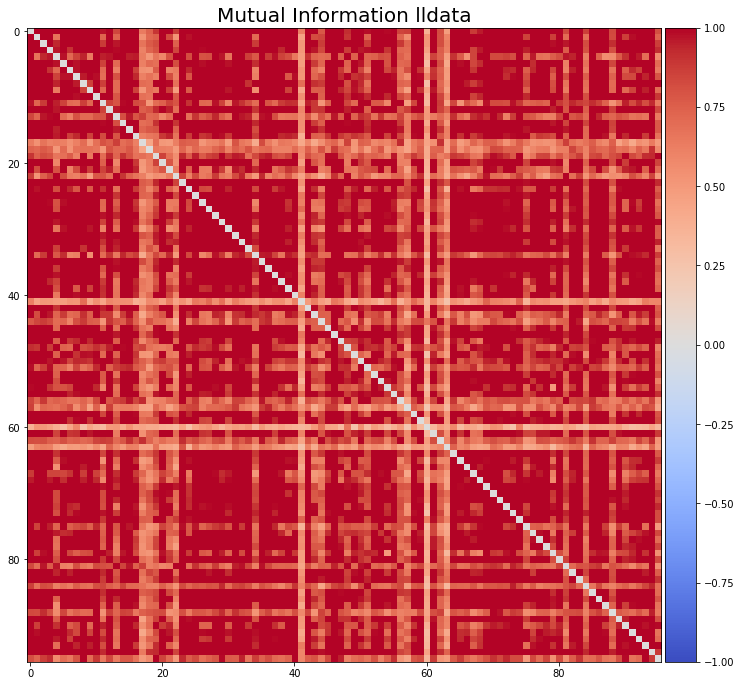

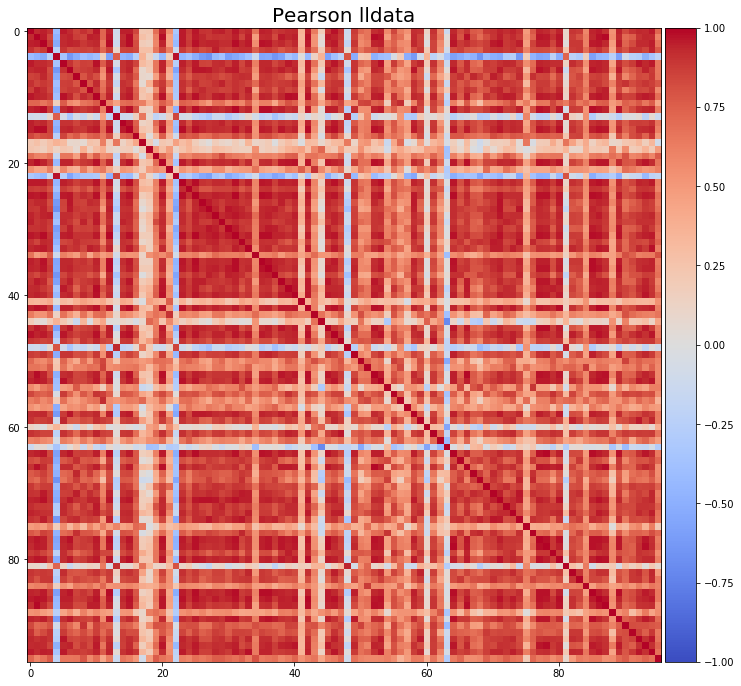

In [89]:
# Load comput and visualize stock data
load_compute_visualize_2(r'C:\Users\Ol\Documents\EXPERIMENTS\BRAINHACK_2017\GIT\FunctionalConnectivity_AoNBrainhackWarsaw\datasets\stock_exchange\alldata.csv',\
                        index_col=0, bins=10)